In [5]:
# 這邊是測試文字雲正常運作
from wordcloud import WordCloud

In [6]:
text = "hello world hello"

In [7]:
wordcloud = WordCloud().generate(text)
wordcloud.to_file("wordcloud.png")


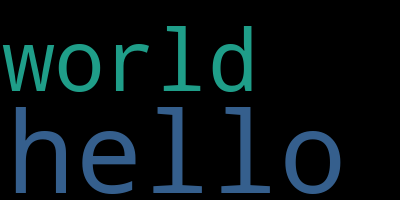

In [8]:
from IPython.display import Image
Image(filename='wordcloud.png')


In [10]:
# 這邊要實戰

with open('divina .txt', 'r', encoding='utf-8') as f:
    text = f.read()

wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)


In [11]:
wordcloud.to_file('divina_wordcloud.png')

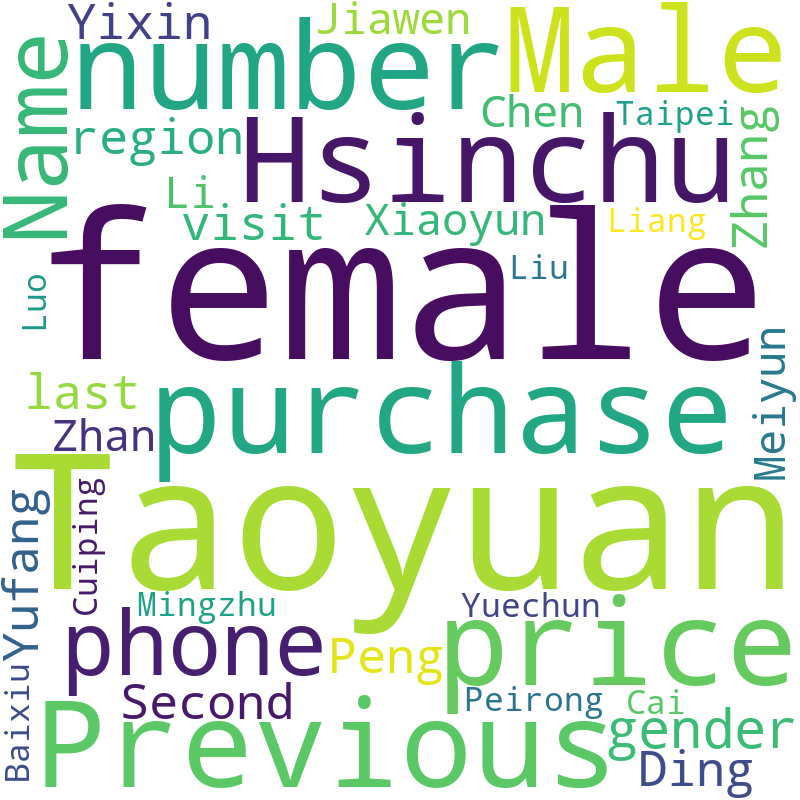

In [12]:
from IPython.display import Image
Image(filename='divina_wordcloud.png')
